Group 9: Gabriel Taylor and Jacob Smith


# Data Import, Download

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df_raw = df
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Data Cleaning

In [4]:
# Remove Unnamed column
# ease-ment, apparment # to drop
df.drop(["Unnamed: 0"], axis=1, inplace=True)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# cast SALE DATE to to_datetime

df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


In [6]:
# Cast sale year and month to categorical
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [7]:
# Cast applicable columns to be numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Cast applicable columns to be categorical 
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [10]:
# Sum up the amount of null variables in all columns
print(df.isna().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64


In [11]:
df.replace(' ',np.nan, inplace=True)

<AxesSubplot:>

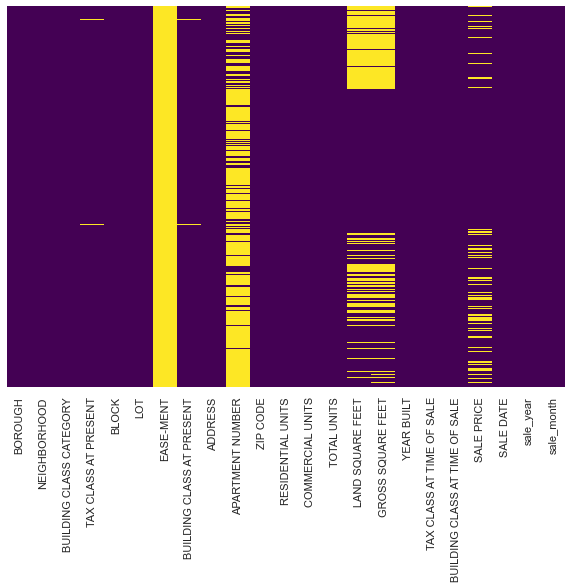

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Drop variables with too many nulls
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [14]:
# Drop empty values
df=df.dropna() 

In [15]:
# check for and drop duplicates
df.drop_duplicates(inplace=True)

<AxesSubplot:>

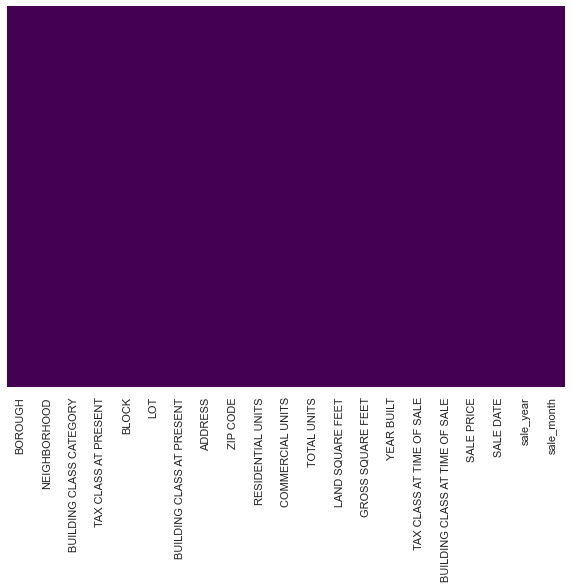

In [16]:
# With nulls and duplicates cleaned up, lets check the heat map again
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Attempt to cast all numbers to numeric to easily see strange outliers
temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47544 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42401 non-null  float64
 4   BLOCK                           47544 non-null  int64  
 5   LOT                             47544 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47544 non-null  int64  
 9   RESIDENTIAL UNITS               47544 non-null  int64  
 10  COMMERCIAL UNITS                47544 non-null  int64  
 11  TOTAL UNITS                     47544 non-null  int64  
 12  LAND SQUARE FEET                

In [18]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


In [19]:
# Calculate sales within range of 10,000 and 10,000,000
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.24310112737674575

In [20]:
# Almost 25% of our data are outliers, lets see some escriptive stats on items outside that range
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.592500e+04
mean     8.781402e+05
std      1.033943e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.418810e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

# Data Visualization

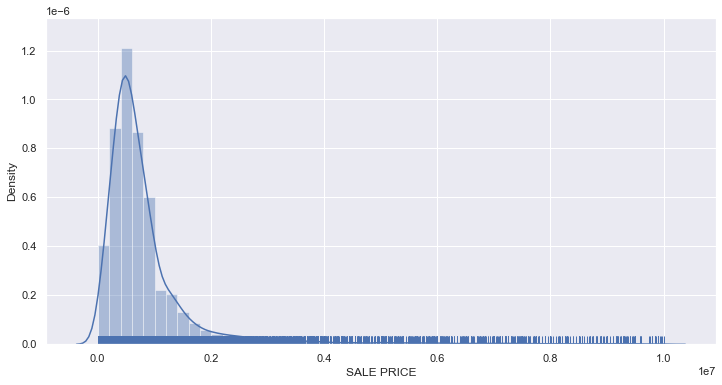

In [21]:
# Our data is very right skewed based on the info above, let's see that in a graph
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

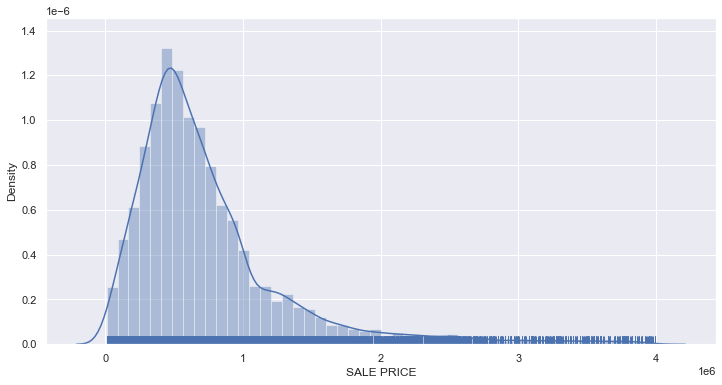

In [22]:
# Reduing the max value allows for a less skewed graph
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()


In [23]:
# Lets see if any year built value is at 0, we wouldn't want those
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1434

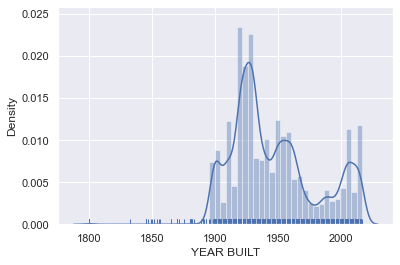

In [24]:
# Let see how our year built data looks without 0 values included 
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

In [25]:
# We'll do the same for total units, first check for values of 0

In [26]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3426

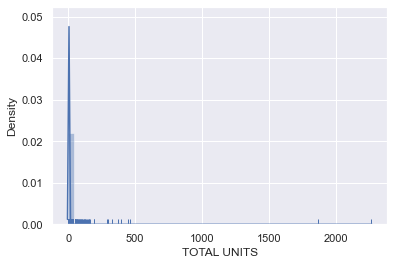

In [27]:
# Vizualize our total units without 0 included
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()

In [28]:
# Descriptive stats for the graphs we just built out, accounting for our changes
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,30236.0,5418.821835,3753.775464,1.0,2395.0,4836.0,7677.0,16319.0
LOT,30236.0,185.704987,384.518819,1.0,22.0,44.0,83.0,3597.0
RESIDENTIAL UNITS,30236.0,1.970532,12.586963,0.0,1.0,1.0,2.0,1844.0
COMMERCIAL UNITS,30236.0,0.173039,13.034598,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,30236.0,2.147804,18.198705,1.0,1.0,1.0,2.0,2261.0
LAND SQUARE FEET,30236.0,3133.582088,27966.319284,0.0,1816.5,2417.0,3500.0,4228300.0
GROSS SQUARE FEET,30236.0,2440.363276,23800.244758,0.0,1208.0,1680.0,2392.0,3750565.0
SALE PRICE,30236.0,793820.011146,594725.186839,10001.0,436000.0,630000.0,940000.0,3995000.0


## Finalizing the data set

In [29]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30236 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TO

In [30]:
# Drop columns with information not usefull to us
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

In [31]:
# Lets see visually how the average sale price differs between boroughs, we'll set that up here
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


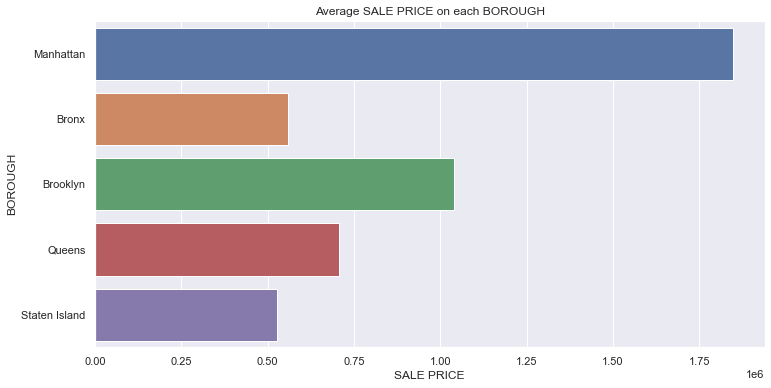

In [32]:
# Visualizing sale price by Burough shows the massive discrepancy between Manhattan and everything else 
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

In [33]:
# Lets see total sales split up by month visually, setting that df up here
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,2432
1,2,2323
2,3,2782
3,4,2344
4,5,2565
5,6,2931
6,7,2328
7,8,1937
8,9,2807
9,10,2373


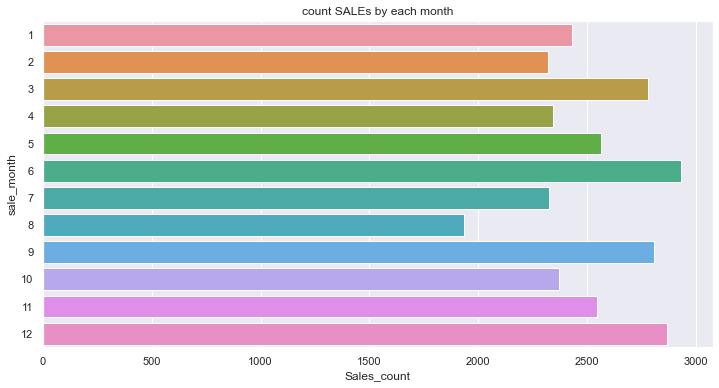

In [34]:
# Sales peaked during the 6th month of the year and the 8th, both the high and the low occured during summer
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()